# Get the Data

### Download the data

In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")  # joining the path '/datasets/housing'
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """
    This function fecthing the data from the given url and store it to the housing path
    """
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)  # download the data
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)  # extract the tgz -> .csv
    housing_tgz.close()

In [ ]:
fetch_housing_data()

In [2]:
# Load the Data into DataFrame
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

### Take a Quick Look at the Data Structure

In [3]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


From the data above, we realize that the ocean approximity is not a value.  
It's probably the categorical

In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


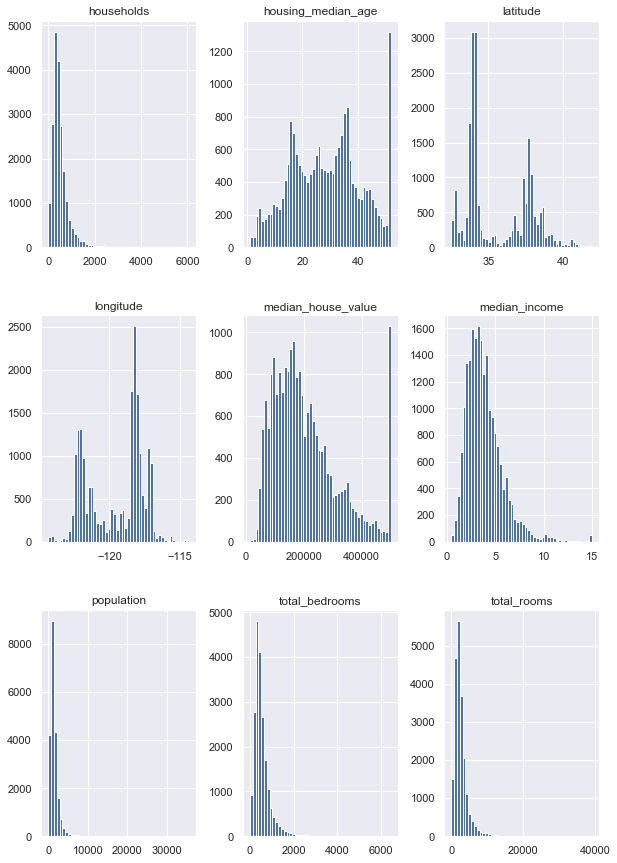

In [7]:
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(10, 15))
plt.show()

### Create a Test Set

In [8]:
import numpy as np

def split_train_test(data, test_ratio):
    """
    Function to split test and training set
    data: pandas dataframe
    """
    np.random.seed(42)  # to get consistent indices
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(test_ratio * len(data))
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# sklearn equivalent
from sklearn.model_selection import train_test_split

In [9]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print('{} train + {} test'.format(len(train_set), len(test_set)))

16512 train + 4128 test


In [10]:
# create temp column to create the median income category
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

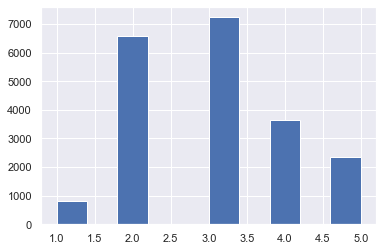

In [11]:
housing["income_cat"].hist()
plt.show()

In [12]:
# stratified sampling from sklearn
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)  # create the StratifiedShuffleSplit object
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [14]:
# drop the income_cat (no longer needed)
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize teh Data to Gain Insights

- Never ever use the test set from this point. 
- If the training set is to big, then consider to sample it to make the exploration faster

In [15]:
# copy the training set, so it won't ruin the original training set
housing = strat_train_set.copy()

### Visualizing Geographical Data

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


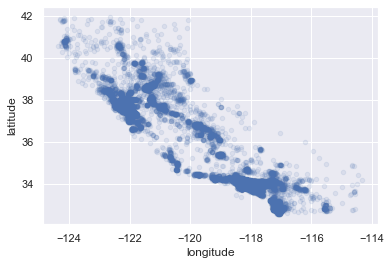

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

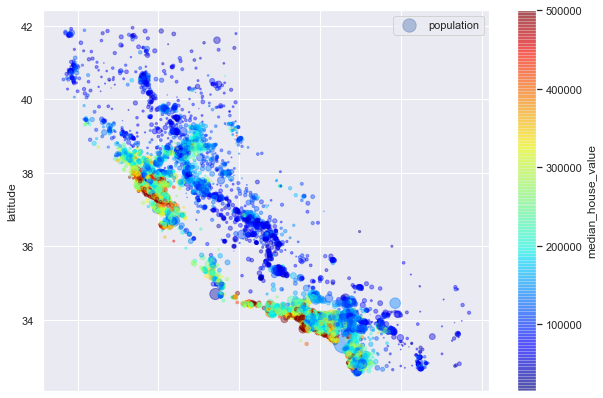

In [17]:
# plot the housing price
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.show()

### Looking for Correlations

In [18]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [19]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

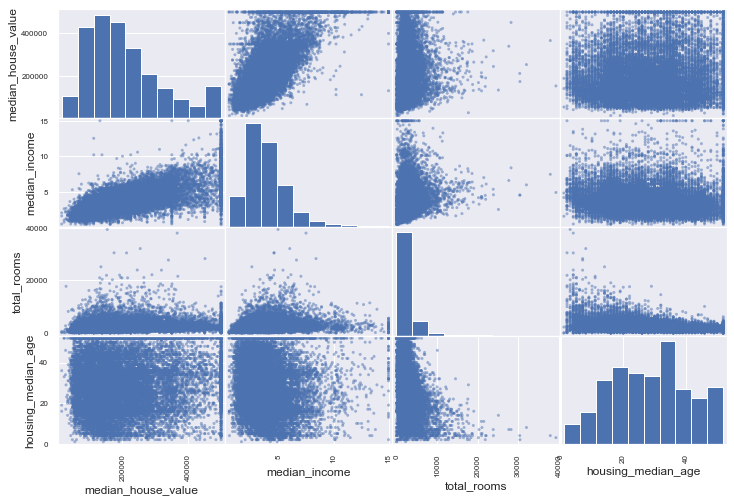

In [20]:
# correlation using pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

The most promising attribute to predict median house value is the median income,  
let's take a look

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


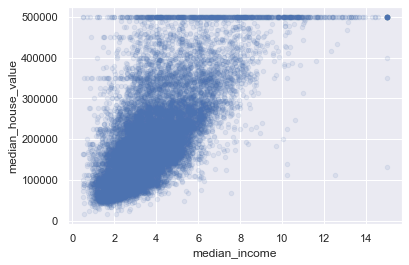

In [21]:
housing.plot(kind='scatter', x="median_income", y="median_house_value", alpha=0.1)
plt.show()

### Experimenting with Attribute Combinations
page 59

In [22]:
# since number of total rooms in a district is not really helpful if we don't know the number of households
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
# percentage to total bedrooms from all teh room in a district
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
# how many persons in a household in a district on average
housing["population_per_household"] = housing["population"] / housing["households"]

In [23]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

- Notice that bedrooms/room has a higher correlation than # bedrooms or # rooms in a district
- rooms/household is also higher than total rooms, etc

# Prepare the Data for Machine Learning Algorithms
###### Why we should write a function to process this?
- If we get a new data it's easy to process
- Reusable in the future
- Use the function to process the data in deployment (when new data comes in)


Copy the original data and drop the target value

In [24]:
housing = strat_train_set.drop('median_house_value', axis=1)  # not in-place, return the copy
housing_label = strat_train_set['median_house_value'].copy()

### Data Cleaning

Strategy to handle missing values in the data:
- Get rid of the coresponding district <br>
```housing.dropna(subset=['total_bedrooms'])```  

- Get rid the whole attributes <br>
```housing.drop(['total_bedrooms'], axis=1)```

- Fill the missing value to some value (i.e,mean or median or zero) <br>
```housing['total_bedrooms'].fillna(median, inplace=True)```

Handle missing value with scikit-learn :: SimpleImputer

In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [26]:
# need all data to be numeric, drop the ocean_proximity
housing_num = housing.drop(['ocean_proximity'], axis=1)
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [27]:
imputer.statistics_  # all the median values in the data except the ocean_proximity

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [28]:
housing_num.median().values  # compare to the median on dataframe

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [29]:
housing_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64

In [30]:
# fill the missing values with median in the datasets
X = imputer.transform(housing_num)  # return np array

In [31]:
# create a dataframe training set from the imputer return
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


### Handling Text and Categorical Attributes

In [32]:
# assign the categorical tha we left off
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

Pandas' ```factorize()``` converts automatically categorycal string to a value

In [33]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0])

In [34]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

But it won't be a perfect features for our model since 0 is more similar to 4 instead of 2, 
thus the model won't notice it.

One-hot-encoding will be more appropriate, but the ```OneHotEncoder``` needs the data to be numeric,  
can't process text. Thus we use the ```housing_cat_encoded``` from above.

In [35]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))  # need to be a matrix
housing_cat_1hot

/Users/RadenRoyPradana/Documents/Education/Unformal Educations/Book/Handson ML/code_resource/mlenv/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [36]:
housing_cat_1hot.toarray()  # convert the one-hot into array

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

``` CategoricalEncoder``` , (Not release yet), does all the process in one shot, instead of use the ```factorize()``` then ```OneHotEncoder```.

### Custom Transformers

Create a ```class``` inherit from ```BaseEstimator``` and ```TransformerMixin```

In [37]:
"""
Redo the attributes combination using a class/function, so it can be done to the new data,
Using the base from sklearn so we can use it using pipeline
"""
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6  # indices

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):  # no *args or *kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_houshold = X[:, rooms_ix] / X[:, household_ix]
        population_perhousehold = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_houshold, population_perhousehold, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_houshold, population_perhousehold]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [38]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [39]:
attr_adder

FunctionTransformer(accept_sparse=False, check_inverse=True,
                    func=<function add_extra_features at 0x108d90620>,
                    inv_kw_args=None, inverse_func=None,
                    kw_args={'add_bedrooms_per_room': False},
                    pass_y='deprecated', validate=False)

### Feature Scaling

Two type of feature scaling:  
- *min-max scalling* ==> normalization ```MinMaxScaler``` in ```sklearn```  
$$normalization = \frac{x - min X}{maxX - minX}$$  
  
  
- *standarization* ==> demeaning  ```StandardScaler``` in ```sklearn```
$$standarization = \frac{x - \bar{X}}{\sigma^{2}}$$

Feature scaling also needs to be applied to the **test set**

### Transformation Pipelines

The sklearn's ```Pipeline``` helps transformation process to the data in one-run (automatically),  
All function in the Pipeline need to inherit ```BaseEstimator``` and ```TransformerMixin```

In [40]:
# add non-numerical colums for the pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attributes_names):
        self.attributes_names = attributes_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attributes_names].values

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),  # only select numerical value
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(categories='auto',sparse=False))
])

In [42]:
from sklearn.pipeline import FeatureUnion

# combine two pipeline
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [43]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [44]:
print("shape", housing_prepared.shape)

shape (16512, 16)


# Select and Train a Model

### Training and Evaluating on the Training Set

Train a Linear Regression Model

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Try out the model with some data

In [46]:
some_data = housing.iloc[:5]
some_labels = housing_label.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("predictions:", lin_reg.predict(some_data_prepared))

predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [47]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Measure the objection function *RMSE*

In [48]:
from sklearn.metrics import mean_squared_error

housing_prediction = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label, housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

In [49]:
def rmse(y_pred, y_true):
    square_error = np.square(y_pred - y_true).sum()
    return np.sqrt(square_error / len(y_pred))

lin_rmse = rmse(housing_prediction, housing_label)
print(lin_rmse)

68628.19819848922


The model is underfitting since the range of housing price in the training set is \\$120,000 - \\$265,000  
and typical prediction error is $68,628.  
So let's try more complex model ```DecisionTreeRegressor```.

In [50]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Let's evaluate on the training set:

In [51]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_rmse = rmse(housing_predictions, housing_label)
print(tree_rmse)

0.0


Sign of overfitting, better to use Cross-Validation

### Better Evaluation Using Cross-Validation

In [52]:
# k-fold cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_label, 
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [53]:
# display the statistics
def display(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std Deviation:", scores.std())
    
display(tree_rmse_scores)

Scores: [69747.01953443 67170.87650108 69691.69130088 69013.65056057
 70477.29205394 74594.97724761 70341.48577212 70354.22417424
 77477.23791276 70678.03792455]
Mean: 70954.64929821945
Std Deviation: 2792.3978705228906


Seems not really good, it overfitts badly to the training set (low bias high variance).  
Now try again the linear model

In [54]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_label, 
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Std Deviation: 2731.674001798348


Now try ```RandomForestRegressor```:

In [55]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_label)
print(rmse(forest_reg.predict(housing_prepared), housing_label))
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_label, 
                              scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display(forest_rmse_scores)

/Users/RadenRoyPradana/Documents/Education/Unformal Educations/Book/Handson ML/code_resource/mlenv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


22251.29593750077
Scores: [52297.86933984 49381.18079228 52052.21150165 55030.68339324
 51574.04604445 56280.90458676 50865.43093338 49979.36672352
 55415.66808531 53510.75913624]
Mean: 52638.81205366591
Std Deviation: 2233.4025152915215


Seems the ```RandomForestRegressor``` works better than the other two, but it still overfit the training data.  
The good approach is before we fine-tune the model, we should look up another model so we have **2 - 5** best model.  
We also can save the model using scikitlearn:   
```python
from sklearn.externals import joblib

joblib.dump(my_model, "my_model.pkl")  # saving the model
# and later....
my_model_loaded = joblib.load("my_model.pkl")  # load the model
```  
  
That way we don't need to retrain every time we back to the code.

# Fine-Tune Your Model

### GridSearch ```GridSearchCV```
- Try every possible combinations of hyperparameter  
- If we don't know what value range, we can try power of 10 => [0.001, 0.01, 0.1, 1, 10, 100, ...]
- Good if we are trying to explore relatively small combinations

In [57]:
%%time

from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 10, 30, 50], 'max_features': [2,4,6,8]},  # first set
              {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},  # w/o adding bootstrap
             ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_label)

CPU times: user 58.1 s, sys: 531 ms, total: 58.6 s
Wall time: 58.7 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [58]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 50}

In [59]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Evaluation scores for each combinations of Hyperparameters:

In [60]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64721.674199509594 {'max_features': 2, 'n_estimators': 3}
55934.003399914174 {'max_features': 2, 'n_estimators': 10}
53068.14156943964 {'max_features': 2, 'n_estimators': 30}
52403.409851513374 {'max_features': 2, 'n_estimators': 50}
61711.58965832955 {'max_features': 4, 'n_estimators': 3}
52972.00657292589 {'max_features': 4, 'n_estimators': 10}
50267.84469074628 {'max_features': 4, 'n_estimators': 30}
50031.261255227946 {'max_features': 4, 'n_estimators': 50}
58542.3400329632 {'max_features': 6, 'n_estimators': 3}
52584.06375819867 {'max_features': 6, 'n_estimators': 10}
50290.68731971242 {'max_features': 6, 'n_estimators': 30}
49479.98006996047 {'max_features': 6, 'n_estimators': 50}
59411.73099343482 {'max_features': 8, 'n_estimators': 3}
52252.76601027252 {'max_features': 8, 'n_estimators': 10}
49986.688349545075 {'max_features': 8, 'n_estimators': 30}
49617.304979614484 {'max_features': 8, 'n_estimators': 50}
61856.52337000369 {'bootstrap': False, 'max_features': 2, 'n_estimators

### Randomized Search ```RandomizedSeacrhCV```
- Evaluates a given number of random combinations by selecting random value for each itereation
- Prefereable if we have a huge number of hyperparameters combinations we want to try.


### Analyze the best Models and Their Errors

In [61]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([7.67751294e-02, 7.38281810e-02, 4.20639688e-02, 1.83607188e-02,
       1.63352602e-02, 1.74386113e-02, 1.62791925e-02, 3.13035113e-01,
       6.43100573e-02, 1.11065012e-01, 7.87530153e-02, 1.00890542e-02,
       1.54275566e-01, 6.98611416e-05, 3.22750842e-03, 4.09375109e-03])

Display number of importance next to its attrubut names:

In [62]:
extra_attribs = ["rooms_per_hhlod", "pop_per_hhold", "bedrooms_per_hholds"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attributes), reverse=True)

[(0.31303511311907234, 'median_income'),
 (0.15427556584448215, 'INLAND'),
 (0.11106501157905045, 'pop_per_hhold'),
 (0.07875301531370264, 'bedrooms_per_hholds'),
 (0.07677512936876128, 'longitude'),
 (0.0738281810159702, 'latitude'),
 (0.0643100572852197, 'rooms_per_hhlod'),
 (0.04206396877865846, 'housing_median_age'),
 (0.01836071882564503, 'total_rooms'),
 (0.017438611294449853, 'population'),
 (0.016335260214390208, 'total_bedrooms'),
 (0.016279192470331393, 'households'),
 (0.010089054241452521, '<1H OCEAN'),
 (0.004093751088851626, 'NEAR OCEAN'),
 (0.003227508418326351, 'NEAR BAY'),
 (6.986114163586576e-05, 'ISLAND')]

### Evaluate Your System on the Test Set

In [65]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
Y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)  # use transform NOT fit_transform()

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

47503.31611526719
